In [165]:
# Initialize Otter
import otter
grader = otter.Notebook("hw03.ipynb")

# 📰 Homework 3: Text Analysis of New York Times Articles

### Due Date: Thursday, February 20, 11:59 PM

You must submit this assignment to Gradescope by the on-time deadline, **Thursday, February 20**, at 11:59 PM. Please read the syllabus for the Slip Day policy. No late submissions beyond what is outlined in the Slip Day policy will be accepted. **We strongly encourage you to submit your work to Gradescope several hours before the stated deadline.** This way, you will have ample time to reach out to staff for support if you encounter difficulties with submission. While course staff is happy to help guide you with submitting your assignment ahead of the deadline, we will not respond to last-minute requests for assistance.

Please read the instructions carefully when submitting your work to Gradescope.

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the homework, we ask that you **write your solutions individually**. If you do discuss the assignments with others, please **include their names** below.


**Collaborators**: _list collaborators here_


## 📝 This Assignment
Welcome to Homework 3! In this assignment, we will analyze New York Times articles discussing trending topics from the past six years.

You will gain experience with:

- Cleaning and exploring a text-based dataset,
- Manipulating data in `pandas` using `string` accessors,
- Creating and interpreting visualizations with `seaborn`,
- Writing and applying regular expressions (regex) with `pandas`, and
- Performing sentiment analysis on text using the `DistilBERT` language model.


In [166]:
# Run this cell to set up your notebook. 
import warnings
warnings.simplefilter(action="ignore")

import re
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ds100_utils import *

# Ensure that pandas shows at least 280 characters in columns, so we can see full articles.
pd.set_option("max_colwidth", 280)
plt.style.use("fivethirtyeight")
sns.set()
sns.set_context("talk")
sns.set_palette("colorblind")

In this assignment, we will use the [DistilBERT model](https://medium.com/huggingface/distilbert-8cf3380435b5), a Natural Language Processing (NLP) model designed to capture the context and meaning of words within sentences. While you are not expected to understand the intricate details of the model, we will utilize it to perform sentiment analysis on textual data. The necessary tools and the corresponding model are imported below.

- **If you encounter any warnings, please ignore them. As long as the cell executes successfully, there should be no issues.**

## ⚠️ IMPORTANT NOTE

Due to limited computing resources on DataHub, the cell below **may take a significant amount of time to run** (potentially several minutes). This may also apply to other cells later in the assignment that load and use the NLP model.

**Please be patient**, wait, and **avoid restarting the kernel or rerunning these cells** more than necessary. Doing so can slow down *your* notebook and impact *other students* on the same CPU cluster.

Additionally, **DO NOT** open this assignment in multiple tabs or windows. This can cause your notebook to crash and affect DataHub's performance.

Please be patient and seek assistance during Office Hours or on Ed if you encounter any issues!


### Score Breakdown

 Question | Manual| Points
--- |---| ---
1a |No| 1
1b |No| 1
1c |No| 1
2ai |No| 2
2aii |No| 1
2aiii |No| 2
2bi |No| 1
2bii |No| 1
2biii |Yes| 1
2c |No| 2
2d |No| 2
2e |No| 1
2fi |Yes| 1
2fii |Yes| 2
3a |No| 1
3bi |No| 1
3bii |No| 1
3c |Yes| 1
3di |No| 1
3dii |Yes| 1
3e |Yes| 2
**Total** | **6** | **27**

## 🏎️ Before You Start

For each question in the assignment, please write down your answer in the answer cell(s) right below the question.

We understand that it is helpful to have extra cells breaking down the process towards reaching your final answer. If you happen to create new cells below your answer to run code, **NEVER** add cells between a question cell and the answer cell below it. It will cause errors when we run the autograder, and it will sometimes cause a failure to generate the PDF file.

**Important note: The local autograder tests will not be comprehensive. You can pass the automated tests in your notebook but still fail tests on Gradescope after the grades are released.** Please be sure to check your results carefully.

Finally, unless we state otherwise, **do not use for loops or list comprehensions**. The majority of this assignment can be done using built-in commands in `pandas` and `NumPy`.

### Debugging Guide

If you run into any technical issues, we highly recommend checking out the [Data 100 Debugging Guide](https://ds100.org/debugging-guide/). In this guide, you can find general questions about Datahub, Gradescope, and common `pandas` and RegEx errors.


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Question 1: Importing the Data

The data for this assignment is sourced from the [New York Times (NYT) Archive API](https://developer.nytimes.com/docs/archive-product/1/overview), which provides information about articles published in the past.

The file `data/nyt_articles.txt` contains filtered data of specific NYT articles published between 2019 and 2024 (inclusive). Each article discusses trending topics, which we will specify shortly.

<br>

---

### Question 1a

Let's examine the contents of the `data/nyt_articles.txt` file.

Using the [`open()` function](https://docs.python.org/3/library/functions.html#open) and the [`read()` method](https://docs.python.org/3/tutorial/inputoutput.html#methods-of-file-objects) of a `python` file object, read **the first 330 characters** of the file `data/nyt_articles.txt` and store the result in the variable `q1a`. Then, print the result to inspect it.

**CAUTION:** Viewing the contents of large files in a Jupyter Notebook can crash your browser. Be careful not to print the entire contents of the file.

In [167]:
with open('data/nyt_articles.txt','r') as art:
    q1a = art.read(330)
print(q1a)

[{"web_url":"https:\/\/www.nytimes.com\/2019\/01\/01\/us\/politics\/elizabeth-warren-president.html","pub_date":"2019-01-01T05:18:48+0000","lead_paragraph":"Good Tuesday morning and Happy New Year. Here are some of the stories making news in Washington and politics today."},{"web_url":"https:\/\/www.nytimes.com\/2019\/01\/01\/ar


In [168]:
grader.check("q1a")

q1a results: All test cases passed!

<br>

---

###  Question 1b

Based on the printed output from `q1a`, what format is the data in?

**A.** CSV<br/>
**B.** JavaScript Object Notation (JSON)<br/>
**C.** HTML<br/>
**D.** Excel (XLSX)

Answer in the following cell. Your answer should be a string, either `"A"`, `"B"`, `"C"`, or `"D"`, stored in the variable `q1b`.

**CAUTION:** Viewing the contents of large files in a Jupyter Notebook can crash your browser. Be careful not to print the entire contents of the file, and do not use the file explorer to open data files directly.

In [169]:
q1b = 'B'

In [170]:
grader.check("q1b")

q1b results: All test cases passed!

<br>

---

###  Question 1c
`pandas` has built-in readers for many different file formats. To learn more about these, check out the documentation:

- `pd.read_csv` [(docs)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
- `pd.read_json` [(docs)](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html)
- `pd.read_html` [(docs)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html)
- `pd.read_excel` [(docs)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)

Load the file `data/nyt_articles.txt` as a `DataFrame`, and store it in the variable `news_df`.

**Hint:** If your code is taking a while to run, you should review your answers to `q1a` and `q1b`; you may have used the incorrect data loading function.

In [171]:
news_df = pd.read_json('data/nyt_articles.txt')
news_df.head()

,web_url,pub_date,lead_paragraph
0,https://www.nytimes.com/2019/01/01/us/politics/elizabeth-warren-president.html,2019-01-01T05:18:48+0000,Good Tuesday morning and Happy New Year. Here are some of the stories making news in Washington and politics today.
1,https://www.nytimes.com/2019/01/01/arts/television/whats-on-tv-tuesday-marie-kondo-doctor-who.html,2019-01-01T06:00:04+0000,"Ring in the new year with some organization inspiration, courtesy of Marie Kondo, and the first-ever ""Doctor Who"" New Year’s Day special."
2,https://www.nytimes.com/2019/01/01/travel/three-new-years-resolutions-for-better-travel-in-2019.html,2019-01-01T10:00:06+0000,"It’s not uncommon for people to set unrealistic expectations when making New Year’s resolutions, which likely contributes to most of them failing. Over 90 percent of them do, according to research by the University of Scranton."
3,https://www.nytimes.com/2019/01/01/world/europe/russia-baby-rescue.html,2019-01-01T16:41:24+0000,"MOSCOW — Rescue workers pulled a 10-month-old baby boy alive from a partly collapsed apartment building in central Russia on Tuesday, calling him a ""New Year miracle"" after he survived in the rubble for more than 35 hours in freezing temperatures."
4,https://www.nytimes.com/2019/01/01/world/europe/germany-foreigners-attack.html,2019-01-01T17:57:51+0000,"BERLIN — Targeting foreigners, a man repeatedly drove his car at pedestrians celebrating New Year’s Eve in western Germany, injuring four people before being arrested, the police and prosecutors said Tuesday."


In [172]:
grader.check("q1c")

q1c results: All test cases passed!

<br/>

<hr style="border: 1px solid #fdb515;" />

##  Question 2: Topic Trends Over Time

Now that we've loaded the NYT data, let's analyze trends in different topics. This will help us understand how various subjects have evolved over the years and identify any significant patterns or shifts in public interest.

We will start by extracting date and time information from the articles and then proceed to analyze the frequency and context of specific topics mentioned in the articles.


<br>


---

###  Question 2a

In this question, we will process the `pub_date` column of our dataset to canonicalize time-related data.
This will help us investigate the trend of news articles across units of time like years, months, and seasons.

####  Question 2a, Part i

Create a new `DataFrame` called `dates` that contains:
1. The same index as `news_df`
2. Three columns: `Month`, `Year`, and `Minute`, which contain the month, year, and minute, respectively, that each article was published.

Additionally, convert all numerical values (`Month`, `Year`, `Minute`) to type `int`.

**Note:** For this problem, you are not permitted to use methods from the `Series.dt` accessor.

**Hint 1:** Use the `Series.str.extract` function ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html)).

**Hint 2:** Use raw strings and capture groups. You may find it helpful to copy the example date and time entries above into [regex101.com](https://regex101.com/) to experiment with regular expressions.

**Hint 3:** It might be helpful to break this up into a couple of steps (e.g., first extract date values and then extract time values).

In [173]:
pattern = r'(\d+)-(\d+)-\d+T\d\d:(\d+).+'
dates = news_df['pub_date'].str.extract(pattern, expand = True).astype(int)
dates.columns = ["Year","Month","Minute"]
dates.index = news_df.index

In [174]:
grader.check("q2ai")

q2ai results: All test cases passed!

---
####  Question 2a, Part ii

We aim to analyze topic trends over time by merging news article data with corresponding date and time data. 

Use the `pd.DataFrame.merge` [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) to merge the `dates` `DataFrame` with the `news_df` `DataFrame`. Ensure that `news_df` is the left `DataFrame` and `dates` is the right `DataFrame` in the merge operation.

Assign the merged `DataFrame` to a variable named `news_df_dates`.

In [175]:
news_df_dates = pd.DataFrame.merge(news_df,dates,left_index=True,right_index=True)

In [176]:
grader.check("q2aii")

q2aii results: All test cases passed!

#### Question 2a, Part iii

Add a column to `news_df_dates` called `Quarter` that contains the [fiscal quarter](https://www.investopedia.com/terms/q/quarter.asp#:~:text=The%20standard%20calendar%20quarters%20that,August%2C%20and%20September%20(Q3)) each news article was published.

Each value of `Quarter` should be in the format `"<Year>Q<Quarter Number>"`.

For example:
- A news article published in May 2021 will have its `Quarter` value as `"2021Q2"`.
- A news article published in October 2023 will have its `Quarter` value as `"2023Q4"`.

Do not hardcode the conversion from month to quarter (e.g., using the dictionary `{1: 'Q1', 2: 'Q1', ..., 12: 'Q4'}`). Instead, perform a mathematical operation to convert the month to quarter.

**Hint:** Adding two `Series` of strings (e.g., `ser_1 + ser_2`) performs an element-wise concatenation of their elements.

In [177]:
fiscal_quarter = {1:'Q1',2:'Q1',3:'Q1',4:'Q2',5:'Q2',6:'Q2',7:'Q3',8:'Q3',9:'Q3',10:'Q4',11:'Q4',12:'Q4'}
news_df_dates['Quarter'] = news_df_dates['Year'].astype(str) + news_df_dates['Month'].map(fiscal_quarter).astype(str)


In [178]:
grader.check("q2aiii")

q2aiii results: All test cases passed!

<br>

---

###  Question 2b

In this question, we will answer some EDA questions about `news_df_dates`.

####  Question 2b, Part i
In `news_df_dates`, suppose we create a new column `num_google_mentions` that records the number of times the word `"google"` is mentioned in each news article. What type of variable is `num_google_mentions`?

**A.** Quantitative variable<br/>
**B.** Qualitative Ordinal variable<br/>
**C.** Qualitative Nominal variable

Answer in the following cell. Your answer should be a string, either `"A"`, `"B"`, or `"C"`, stored in the variable `q2bi`.

In [137]:
q2bi = 'A'

In [138]:
grader.check("q2bi")

q2bi results: All test cases passed!

####  Question 2b, Part ii
Which of the following options best describes the granularity of `news_df_dates`? 

Each row in `news_df_dates` uniquely describes:

**A.** A calendar date. <br/>
**B.** An hour of a calendar date. <br/>
**C.** A news article.

Answer in the following cell. Your answer should be a string, either `"A"`, `"B"`, or `"C"`, stored in the variable `q2bii`.

In [139]:
q2bii = 'C'

In [140]:
grader.check("q2bii")

q2bii results: All test cases passed!

<!-- BEGIN QUESTION -->

####  Question 2b, Part iii

Suppose we wanted to investigate trends in how often the word `"AI"` is mentioned in NYT articles since the 1980s.

Is `news_df` a suitable dataset for this investigation? Explain your reasoning.

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br>

---

###  Question 2c

Some news articles include quotes in their lead paragraph (i.e., first paragraph) to grab the reader's attention and provide additional context. For the purposes of this question, a quote is defined as a sequence of characters starting with the character `"` and ending with a period (`.`), question mark (`?`), or exclamation point (`!`), followed by a closing `"`. For example:
- `"The mitochondria is the powerhouse of the cell!"`
- `"Did DATA C100 course staff host a social event with staff from DATA C8?"`
- `"R is great." A TA said, "but have you tried using Python?"`

If we follow the definition above, the following text snippet contains two quotes:
- `The TA asked, "What's the purpose of regular expressions?" The student thought for a moment and then replied, "Regex are used to identify patterns in text."`



Brandon wants to extract individual quotes from paragraphs using the definition of a quote given above.
Brandon proposes the regex pattern `r'\".*[\.\?\!]\"'`. Unfortunately, Brandon's pattern identifies only one quote in the test string below instead of two.

Modify Brandon's regex pattern so that it correctly matches the two quotes individually. Store your new pattern in the variable `modified_pattern`.

In [141]:
test_string = '"How are your classes?" the student asked. "Super challenging! But a lot of fun!" said their roommate.'

print("Test string:", test_string)
print("Original pattern identifies:", re.findall(r'\".*[\.\?\!]\"', test_string))

modified_pattern = r'(\".*?[\.\?\!]\")'
print("Modified pattern identifies:", re.findall(modified_pattern, test_string))
re.findall(modified_pattern, '"How are your classes?" the student asked. "Super challenging! But a lot of fun!" said their roommate.')

Test string: "How are your classes?" the student asked. "Super challenging! But a lot of fun!" said their roommate.
Original pattern identifies: ['"How are your classes?" the student asked. "Super challenging! But a lot of fun!"']
Modified pattern identifies: ['"How are your classes?"', '"Super challenging! But a lot of fun!"']


['"How are your classes?"', '"Super challenging! But a lot of fun!"']

In [142]:
grader.check("q2c")

q2c results: All test cases passed!

<br>

---

###  Question 2d

Next, we will investigate popularity trends of the following four topics: [New Year](https://en.wikipedia.org/wiki/New_Year), [Wordle](https://www.nytimes.com/games/wordle/index.html), [Zoom](https://www.zoom.com/), and [GPT models](https://en.wikipedia.org/wiki/Generative_pre-trained_transformer).

For each topic, add an integer column to `news_df_dates` indicating the number of times the topic is mentioned in the `lead_paragraph` (i.e., first paragraph) of each article. 

- The columns should be named `"New Year"`,  `"Zoom"`, `"Wordle"`, and `"GPT Model"`.

- You may use a `for` loop to iterate over a list of the four topics.

Here are the definitions of a single "mention" of each topic:
- New Year: An appearance of `"New Year"` or `"New Years"`, surrounded by non-word characters, in the lead paragraph of the article. For example, `"Happy New Year!"` is a match.
- Wordle: `"Wordle"`, surrounded by non-word characters. For example, `"Wordless"` would not match.
- Zoom: `"Zoom"`, surrounded by non-word characters. For example, `"Zoomer"` would not match.
- GPT Model: either (1) a consecutive sequence of alphabetical characters, followed by an optional dash (`-`), then `GPT`; or (2) `GPT`, then a dash (`-`), then a numeric digit, then an optional alphabetical character.
    - For example, these words match: `"ChatGPT"`, `"CHAT-GPT"`, `"GPT-3"`, `"GPT-4o"`.
    - However, these words do not match: `"chatgpt"`, `"chatgpt-4o"`.


In [ ]:
topics = ["New Year", "Wordle", "Zoom", "GPT Model"]
regex = [r'\WNew Years?',r'\WWordle\W',r'\WZoom\W',r'\w-?GPT|\bGPT-\w?\B']
for t,r in zip(topics,regex):
    news_df_dates[t]=news_df_dates['lead_paragraph'].str.count(r)
news_df_dates.head(1)

Index(['web_url', 'pub_date', 'lead_paragraph'], dtype='object')


In [144]:
grader.check("q2d")

q2d results: All test cases passed!

<br>

---

###  Question 2e

Create a new `DataFrame` called `topic_mentions` with the following characteristics:

- There should be one column for each topic (`"New Year"`,  `"Zoom"`, `"Wordle"`, and `"GPT Model"`).

- The index should be `Quarter`.

- The values are the number of articles that mentioned each topic in each quarter. 

**Hint**: Define a helper function `num_mentioned(ser)`, which takes a `Series` object `ser` and returns the number of entries in `ser` that are larger than `0`.

In [145]:
topics = ["New Year", "Wordle", "Zoom", "GPT Model"]
topic_mentions = pd.DataFrame(index=news_df_dates['Quarter'].unique())
for t in topics:
    topic_mentions[t] = news_df_dates.groupby('Quarter')[t].agg(np.sum)
# Year 2023 records
topic_mentions

,New Year,Wordle,Zoom,GPT Model
2019Q1,39,0,0,0
2019Q2,11,0,0,0
2019Q3,4,0,0,0
2019Q4,30,0,0,0
2020Q1,45,0,7,0
2020Q2,4,0,88,0
2020Q3,9,0,67,0
2020Q4,30,0,63,0
2021Q1,44,0,41,0
2021Q2,3,0,41,0


In [146]:
grader.check("q2e")

q2e results: All test cases passed!

<!-- BEGIN QUESTION -->

<br>

---
### Question 2f

Let's visualize the article counts for each topic by quarter from 2019 to 2024.

#### Question 2f, Part i

Using `sns.lineplot` ([documentation](https://seaborn.pydata.org/generated/seaborn.lineplot.html)) and `topic_mentions`, visualize the topic trends across quarters. Your plot should look like this:

<center>
    <img src="./images/topic_mentions.png" width="750" align="left">
</center>



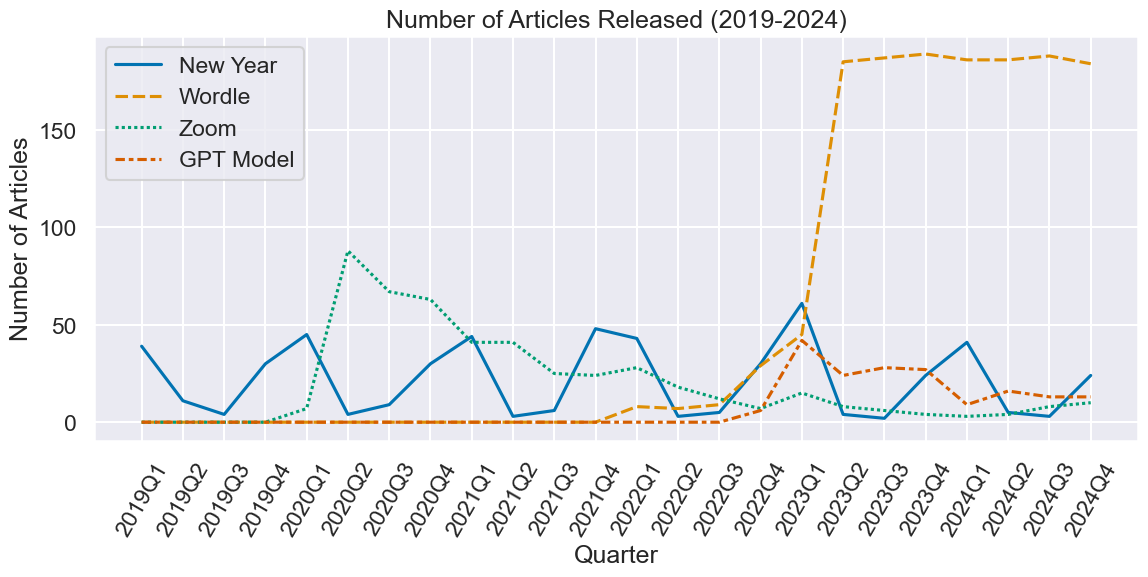

In [147]:
plt.figure(figsize=(12, 5)) # DO NOT MODIFY
sns.lineplot(topic_mentions)

# DO NOT MODIFY THE CODE BELOW
# If your solution above is correct, running this cell should produce the plot above.
plt.xticks(rotation=60)
plt.yticks()
plt.ylabel("Number of Articles")
plt.xlabel("Quarter")
plt.title("Number of Articles Released (2019-2024)")
plt.gcf().set_facecolor('white')
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

####  Question 2f, Part ii

For each of the four topics, identify one interesting pattern in the visualization and provide a tentative explanation of why you think the pattern exists.


<br>

<center>
    <img src = "images/topic_mentions.png" width = "750" align="left">
</center>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br/>

<hr style="border: 1px solid #fdb515;" />

##  Question 3: Sentiment Analysis

**Sentiment analysis** involves using an NLP model to classify the emotional tone of text. For example, "You're great!" has a positive sentiment, while "I feel horrible" has a negative sentiment.

In this section, we will explore temporal changes in the **sentiment** of NYT articles that mention each topic.

> The sentiment values in this section were computed using a fine-tuned version of the **DistilBERT** model ([GitHub](https://github.com/huggingface/transformers/tree/main/examples/research_projects/distillation), [original paper](https://arxiv.org/abs/1910.01108)).
>
> DistilBERT is a neural network-based language model similar to ChatGPT. These models are not covered in Data 100, and we don't expect you to know how they work. If you're interested in learning more, consider taking `CS182: Neural Networks` or `Data 102: Data, Inference, and Decisions`.
>
> The [HuggingFace library](https://huggingface.co/) was used to build the sentiment analysis pipeline and load the model. [Here](https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english) is the **model card** of the `DistilBERT` model we used. The model card contains general information about the model, such as training arguments and training data. Again, you don't need to know these details for Data 100!

Run the following three cells to set up the sentiment analysis pipeline and see examples of how we can get the sentiment for different strings.


In [148]:
from transformers import pipeline
model_checkpoint = "distilbert/distilbert-base-uncased-finetuned-sst-2-english"

In [149]:
import tensorflow as tf
# Load the model
sentiment_analysis = pipeline("sentiment-analysis", model=model_checkpoint)

Device set to use cpu


In [150]:
# Get the sentiment of a given string
sentiment_1 = sentiment_analysis("I have two dogs.")
print("Example 1: " + str(sentiment_1))

sentiment_2 = sentiment_analysis("I do not have dogs.")
print("Example 2: " + str(sentiment_2))

sentiment_3 = sentiment_analysis("Fortunately, I do not have dogs to worry about.")
print("Example 3: " + str(sentiment_3))

Example 1: [{'label': 'POSITIVE', 'score': 0.9955033659934998}]
Example 2: [{'label': 'NEGATIVE', 'score': 0.9987561702728271}]
Example 3: [{'label': 'POSITIVE', 'score': 0.9975079298019409}]


As you can see, the model can determine the sentiment of phrases/sentences (not just words). The model measures the phrase's **polarity**, indicating how strongly negative or positive it is on a scale of 0 to 1.

**Note:** The output is a list, and each list element is a dictionary with two keys (label and score). Note that we could have gotten the sentiments of the two sentences by putting them in a list (batch) and then running the pipeline once (see the code below).


In [151]:
sentiments = sentiment_analysis(["I have two dogs.", "I do not have dogs."])
print(sentiments)

[{'label': 'POSITIVE', 'score': 0.9955033659934998}, {'label': 'NEGATIVE', 'score': 0.9987561702728271}]


<br>

---
###  Question 3a

Try it out yourself! The sentences we provided in the previous example have pretty high polarity scores. Let's see how the model behaves with more ambiguous sentences.

Write a sentence `less_polar_sentence` that has a polarity score of less than 0.8. This may take some trial and error. Let this be an opportunity to think about whether the model works as you'd expect.

In [152]:
less_polar_sentence = "His hobby isnot playing the piano."
results = sentiment_analysis(less_polar_sentence)
print(results)

[{'label': 'POSITIVE', 'score': 0.699130117893219}]


In [153]:
grader.check("q3a")

q3a results: All test cases passed!

<br>

---

###  Question 3b

As a first step, let's obtain the sentiment of the NYT articles that mention these **three** topics: `Zoom`, `New Year`, and `GPT`. 

**Note:** We will not analyze the sentiment of articles that mention `Wordle`.

####  Question 3b, Part i

Create a `DataFrame` called `news_df_filtered` that contains all articles from `news_df_dates` that mention `Zoom`, `New Year`, or `GPT`, but do not mention `Wordle`. Use the same definitions from Question 2c.

In [154]:
news_df_filtered = news_df_dates[(news_df_dates['Wordle'] == 0) & ((news_df_dates['Zoom'] + news_df_dates['New Year'] + news_df_dates['GPT Model']) != 0) ]
news_df_filtered.shape

(1109, 11)

In [155]:
grader.check("q3bi")

q3bi results:
    q3bi - 1 result:
        ❌ Test case failed
        Trying:
            news_df_filtered.shape == (1135, 11)
        Expecting:
            True
        **********************************************************************
        Line 1, in q3bi 0
        Failed example:
            news_df_filtered.shape == (1135, 11)
        Expected:
            True
        Got:
            False

####  Question 3b, Part ii

Having all 1000+ students in Data 100 run the `DistilBERT` model for all articles is too computationally intensive for DataHub. So, we have done this part for you and saved the article sentiment scores in  `nyt_sentiments.csv`:

1. Load the file `data/nyt_sentiments.csv` as a `DataFrame` called `sentiment`. 
2. Set the index of `sentiment` as the `web_url` of each article, which uniquely defines each article.

Note that the model outputs both a label and a score. After importing the data, we recommend taking a look at its structure before attempting the next part.

For each article, `sentiment` provides an outputted `label` and 0 to 1 sentiment `score`. Scores closer to 1 have a stronger sentiment, while scores closer to 0 are more neutral. We can more efficiently communicate the information in these two columns with a single new column. 

3. Add a new column called `article_sentiment` to `sentiment` that provides the existing score if the label is "POSITIVE", and negates the existing score if the label is "NEGATIVE". For example, a score of `0.6` with a label `POSITIVE` would have the value `0.6` in `article_sentiment`, while a score of `0.6` with a label `NEGATIVE` would have the value `-0.6` in `article_sentiment`.

4. Merge `news_df` with `sentiment` using the `web_url` column, making sure that `news_df` is the left `DataFrame` while `sentiment` is the right `DataFrame`. The merged `DataFrame` should be called `news_df_sentiment`.

5. Finally, drop the original `label` and `score` columns.

In [ ]:
sentiment = pd.read_csv('data/nyt_sentiments.csv')
sentiment.set_index('web_url')
sentiment['article_sentiment'] = sentiment_.apply(lambda x: x['score'] if x['label'] == 'POSITIVE' else -x['score'],axis=1)
news_df_sentiment = sentiment.merge(news_df_dates,left_index=True,right_index=True)
news_df_sentiment = news_df_sentiment.drop(columns=['label','score','web_url_x'])
news_df_sentiment = news_df_sentiment.rename(columns={'web_url_y':'web_url'})

In [206]:
grader.check("q3bii")

q3bii results:
    q3bii - 1 result:
        ✅ Test case passed

    q3bii - 2 result:
        ❌ Test case failed
        Trying:
            news_df_sentiment.shape == (1054, 12)
        Expecting:
            True
        **********************************************************************
        Line 1, in q3bii 1
        Failed example:
            news_df_sentiment.shape == (1054, 12)
        Expected:
            True
        Got:
            False

    q3bii - 3 result:
        ✅ Test case passed

    q3bii - 4 result:
        ❌ Test case failed
        Trying:
            news_df_sentiment['article_sentiment'].iloc[1] <= 1 and news_df_sentiment['article_sentiment'].iloc[1] >= -1
        Expecting:
            True
        **********************************************************************
        Line 1, in q3bii 3
        Failed example:
            news_df_sentiment['article_sentiment'].iloc[1] <= 1 and news_df_sentiment['article_sentiment'].iloc[1] >= -1
        Expected:
            True
        Got:
            np.True_

<!-- BEGIN QUESTION -->

<br>

---
###  Question 3c

Let's now visualize the distribution of article sentiment.

Using `seaborn`, we created a histogram to visualize the distribution of `article_sentiment`. Run the cell below to display the plot.

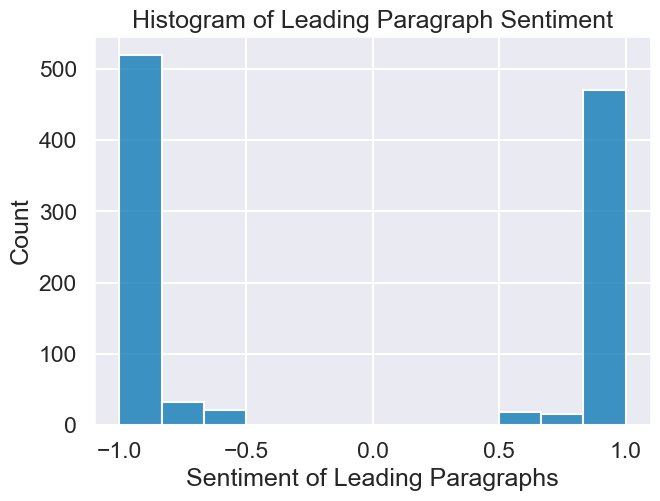

In [208]:
sns.histplot(data=news_df_sentiment, x='article_sentiment')
plt.xlabel('Sentiment of Leading Paragraphs')
plt.title('Histogram of Leading Paragraph Sentiment')
plt.plot();

Are you at all surprised by the distribution of sentiment in the graph above? Describe what you notice about the graph and how it relates to what you learned in part **3a**.

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br>

---
###  Question 3d

Let's audit our data to better understand how well the sentiment analysis model works with our specific dataset. It's good practice to compare our assumptions to model outputs.

####  Question 3d, Part i

Assign `top_positive` and `top_negative` to `DataFrame`s containing the five articles with the highest `article_sentiment` values and the five lowest `article_sentiment` values, respectively. The `DataFrame`s should have the columns `lead_paragraph` and `article_sentiment`.

In [209]:
news_df_sentiment = news_df_sentiment.sort_values(by='article_sentiment',ascending=True)
top_positive = news_df_sentiment.head()
top_negative = news_df_sentiment.tail()

display(top_positive, top_negative)

,article_sentiment,web_url,pub_date,lead_paragraph,Year,Month,Minute,Quarter,New Year,Wordle,Zoom,GPT Model
838,-0.999777,https://www.nytimes.com/2023/01/07/technology/generative-ai-chatgpt-investments.html,2023-01-07T08:00:12+0000,"Five weeks ago, OpenAI, a San Francisco artificial intelligence lab, released ChatGPT, a chatbot that answers questions in clear, concise prose. The A.I.-powered tool immediately caused a sensation, with more than a million people using it to create everything from poetry to ...",2023,1,0,2023Q1,0,0,0,1
91,-0.999759,https://www.nytimes.com/2020/01/01/smarter-living/5-cheap-ish-things-for-your-home-gym.html,2020-01-01T23:32:49+0000,"Kick off the new year right and pick up the brand-new Smarter Living book! We’ve pulled together the best of S.L., plus loads of new advice and guidance, to give you smart, actionable life tips on how to improve your career, your home, your finances, your relationships and yo...",2020,1,32,2020Q1,1,0,0,0
181,-0.999729,https://www.nytimes.com/2020/05/08/t-magazine/house-tours-coronavirus-distraction.html,2020-05-08T21:25:46+0000,"Months into collective efforts to flatten the curve, those of us lucky enough to be working remotely may be feeling overly familiar with our own homes, rooms once traveled through quite casually on our way to somewhere else and that must now function as our entire world. Inev...",2020,5,25,2020Q2,0,0,1,0
955,-0.999702,https://www.nytimes.com/2023/04/07/style/love-letter-newsletter-falling-for-a-chatbot.html,2023-04-07T17:49:35+0000,"In this week’s Modern Love essay, ""Uh Oh, I Seem to Be Dating a Chatbot,"" Anita M. Harris writes about falling for ChatGPT.",2023,4,49,2023Q2,0,0,0,1
189,-0.999698,https://www.nytimes.com/2020/05/18/dining/silver-moon-baking-classes.html,2020-05-18T16:33:30+0000,"For Judith Norell, an owner of Silver Moon Bakery on the Upper West Side, cooking classes are a recent side business. She has started a series of weekly Zoom sessions on Tuesdays, charging a minimal optional fee and will use the funds to provide treats for health care and oth...",2020,5,33,2020Q2,0,0,1,0


,article_sentiment,web_url,pub_date,lead_paragraph,Year,Month,Minute,Quarter,New Year,Wordle,Zoom,GPT Model
544,0.999869,https://www.nytimes.com/2021/09/14/arts/dance/ayodele-casel-little-island-dance-festival.html,2021-09-14T14:00:06+0000,"The good thing about a Zoom interview is that it can take place anywhere. ""I’m stuck in New York parking horror,"" the tap dancer and choreographer Ayodele Casel said. ""But I’m parked.""",2021,9,0,2021Q3,0,0,1,0
494,0.999871,https://www.nytimes.com/2021/04/26/opinion/biden-infrastructure-child-care.html,2021-04-26T09:00:10+0000,"Ask any of the parents who have spent the last year at home with their children, while trying to participate in Zoom meetings, whether child care enables them to show up to work and perform at their best. The direct conflict between children’s need to be cared for during the ...",2021,4,0,2021Q2,0,0,1,0
645,0.999871,https://www.nytimes.com/2022/01/09/sports/running-resolution-tips.html,2022-01-09T19:15:58+0000,New runners working toward their first mile have plenty in common with experienced runners looking to hit an Olympic qualifying time: You’re on the same playing field when it comes to facing down a New Year’s running resolution.,2022,1,15,2022Q1,1,0,0,0
369,0.999872,https://www.nytimes.com/interactive/2020/12/23/at-home/party-blower-activity-new-years-eve.html,2020-12-23T22:00:08+0000,"Even if your New Year’s Eve celebrations are smaller this year, you’ll still need festive supplies. Here’s how to make your own party blower.",2020,12,0,2020Q4,1,0,0,0
914,0.999876,https://www.nytimes.com/2023/03/06/crosswords/wordle-wrap-up-feb-27-to-march-5.html,2023-03-06T14:00:06+0000,"Hi Wordlers! Welcome to Wordle Wrap-Up, a reminder of which words were answers this week. For stories, stats and brain teasers, sign up for the Gameplay newsletter. For a daily reminder to play Wordle, sign up for reminders.",2023,3,0,2023Q1,0,2,0,0


In [210]:
grader.check("q3di")

q3di results: All test cases passed!

<!-- BEGIN QUESTION -->

####  Question 3d, Part ii

Do you agree with the current sentiment-based ordering of news articles, or would you rearrange the ordering? Do you feel that the DistilBERT model is a good model for our task of analyzing sentiment in news articles?

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br>

---

### Continued Visualizing
Let's continue to visualize the `news_df_sentiment` data. The cell below adds a new datetime column `date` to `news_df_sentiment`. The datetime format will make visualization easier.

In [211]:
# Combine the columns into a single date string in 'YYYY-MM-DD' format
news_df_sentiment['date_str'] = (
    news_df_sentiment['Year'].astype(str)
    + '-' + news_df_sentiment['Month'].astype(str)
    + '-' + news_df_sentiment['pub_date'].str[8:10]
)

# Convert the combined string to a datetime object using pd.to_datetime()
news_df_sentiment['date'] = pd.to_datetime(news_df_sentiment['date_str'], format='%Y-%m-%d', errors='coerce')

Below, we visualize the change in sentiment in the topic `Zoom` over time, using `sns.lineplot` to plot `date` on the x-axis and `article_sentiment` on the y-axis.

**Note**: If the following plot is empty, please rerun from all cells starting from Part 3b where `news_df_sentiment` was initialized.

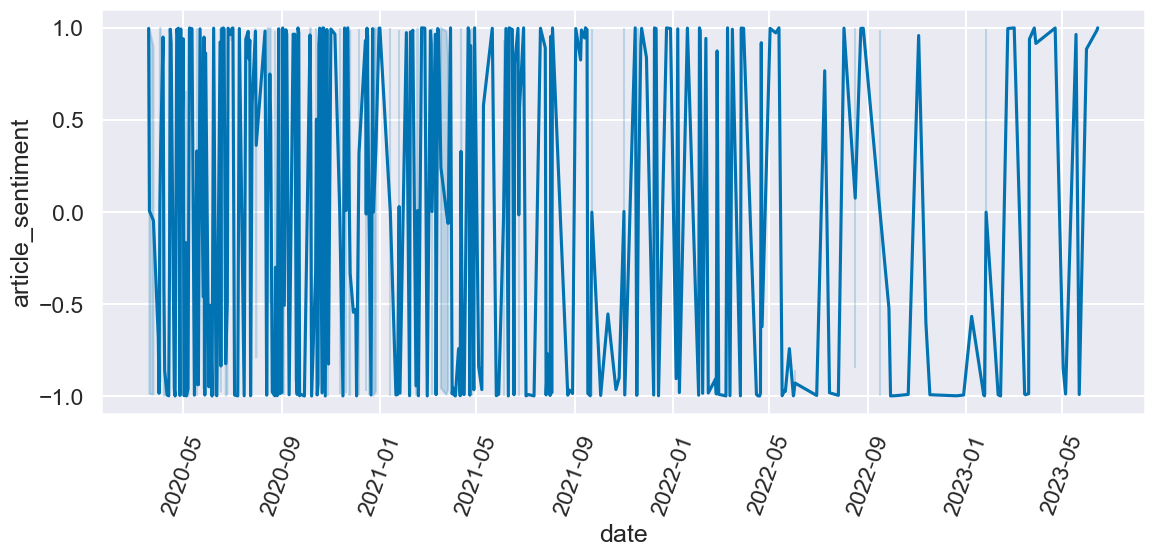

In [212]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(data=news_df_sentiment[news_df_sentiment["Zoom"] > 0], x='date', y='article_sentiment')
plt.xticks(rotation=70);

**This plot is not very pretty!** This isn't because of any errors on your part. Instead, we need to use a different visualization method to understand our data.

<!-- BEGIN QUESTION -->

###  Question 3e

Let's visualize our data more effectively. We will still use `sns.lineplot`, but instead of plotting every observation, we will first aggregate our data, and then plot the aggregated values.

We will also compare sentiment scores across three topics: `New Year`, `Zoom`, and `GPT`.

We will use the `DataFrame` `news_df_sentiment` in this question.

1. For each topic, generate a `DataFrame` that shows the average article sentiment for each quarter. In each `DataFrame`, be sure to include a column called `Topic` that has the same string value in every row (either `New Year`, `Zoom` or `GPT`).
2. Concatenate the `DataFrame`s obtained from step (1) using `pd.concat` ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)). Assign this to `all_topic_qtr_avg_sentiments`.
3. Finally, we have provided the code to plot each topic's average article sentiment in each quarter using `all_topic_qrt_avg_sentiments`.

Your graph should have a similar title, axis labels, markers, and x-axis tick label ordering as the one below.

<img src = "images/sentiment_graph.png" width = "800">

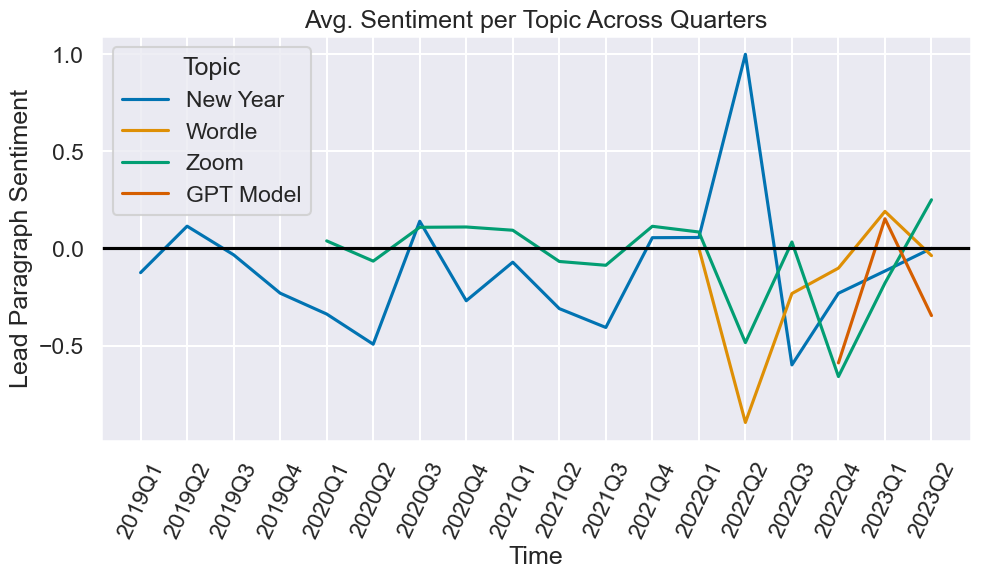

In [241]:
fig, ax = plt.subplots(figsize=(10, 5))
dfs_per_topic = []
for topic in topics:
    df_of_current_topic = news_df_sentiment[news_df_sentiment[topic]!=0].groupby('Quarter')['article_sentiment'].agg(np.mean).to_frame()
    df_of_current_topic = df_of_current_topic.rename(columns={topic:'article_sentiment'})
    df_of_current_topic["Topic"] = topic
    dfs_per_topic.append(df_of_current_topic)

all_topic_qtr_avg_sentiments = pd.concat(dfs_per_topic,axis=0)
sns.lineplot(data=all_topic_qtr_avg_sentiments, x="Quarter", y="article_sentiment", hue="Topic")

plt.title('Avg. Sentiment per Topic Across Quarters')
plt.xlabel('Time')
plt.ylabel('Lead Paragraph Sentiment')

# If the above are implemented correctly, running this cell should produce the graph shown above.
plt.axhline(0, color='black')
plt.xticks(rotation=65);

<!-- END QUESTION -->

<br>

---

### Takeaways

In this homework, we used a language model to evaluate the sentiment of news articles and quantify text data (qualitative data) so that we could perform data analysis on a large set of journalism data. Though we used the [HuggingFace DistilBERT](https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english) model, there are thousands of language models available for use, and with rapid innovations in the NLP research space, there are new models frequently being created. In fact, we were using a different model for this homework one year ago, which reflects how quickly the NLP field progresses. 

Different models evaluate sentiment differently. You may have noticed that the DistilBERT model struggles with evaluating neutral sentences and often gives sentences a high polarity score. When evaluating which models to use in your projects, it's useful to test them on small inputs of data to see how they perform, like we did by testing out various sentences! Different models may perform differently (often due to how the model was trained and created), so it's important to understand these differences when deciding what model to use for your data.


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Levi says congratulations! You have finished Homework 3!

<img src = "images/IMG_6497.jpg" width = "200">

### Course Content Feedback

If you have any feedback about this assignment or about any of our other weekly, weekly assignments, lectures, or discussions, please fill out the [Course Content Feedback Form](https://forms.gle/5SxnFnCPZgCr2koeA). Your input is valuable in helping us improve the quality and relevance of our content to better meet your needs and expectations!

### Submission Instructions

Below, you will see a cell. Running this cell will automatically generate a zip file with your autograded answers. Once you submit this file to the HW 3 Coding assignment on Gradescope, Gradescope will automatically submit a PDF file with your written answers to the HW 3 Written assignment. If you run into any issues when running this cell, feel free to check this [section](https://ds100.org/debugging-guide/autograder_gradescope/autograder_gradescope.html#why-does-grader.exportrun_teststrue-fail-if-all-previous-tests-passed) in the Data 100 Debugging Guide.

**Important**: Please check that your written responses were generated and submitted correctly to the HW 3 Written Assignment.

**You are responsible for ensuring your submission follows our requirements and that the PDF for HW 3 written answers was generated/submitted correctly. We will not be granting regrade requests nor extensions to submissions that don't follow instructions.** If you encounter any difficulties with submission, please don't hesitate to reach out to staff prior to the deadline.


## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)